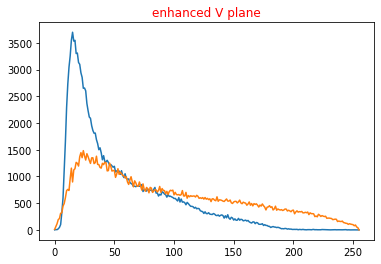

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread('activity im.jpeg')
x,y,w,h = cv2.selectROI(im, fromCenter=0)

mymask= np.zeros(im.shape[:2],  dtype = "uint8")
mymask[int(y):int(y+h) , int(x):int(x+w)]= 255

cv2.imshow('Created mask', mymask)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('mask cherry.png' , mymask)

imgHSV = cv2.cvtColor(im,cv2.COLOR_BGR2HSV);

hist = cv2.calcHist([imgHSV],[2],mymask,[256],[0,255])
plt.plot(hist)
plt.title('V plane', color='b')
v= imgHSV[:,:,2]

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
v[int(y):int(y+h) , int(x):int(x+w)]= clahe.apply(v[int(y):int(y+h) , int(x):int(x+w)])

hist = cv2.calcHist([imgHSV],[2],mymask,[256],[0,255])
plt.plot(hist)
plt.title('enhanced V plane', color='r')

bgr = cv2.cvtColor(imgHSV,cv2.COLOR_HSV2BGR);

cv2.imshow('Enhanced ROI', bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()